In [1]:
## IMPORTS and GLOBAL DEFINITIONS ##
import ROOT
import pyLCIO as LCIO

# Functionality
ROOT.EnableImplicitMT()  # Multithreading

# Stylization
ROOT.gStyle.SetOptTitle(0)  # Remove title from hists so you can add a customized one
# ROOT.gStyle.SetTitleTextColor(17)
# ROOT.gStyle.SetTitleAlign(23)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetCanvasColor(1)
ROOT.gStyle.SetTitleColor(17, "XYZ")
ROOT.gStyle.SetTitleSize(.023, "XYZ")
ROOT.gStyle.SetTitleOffset(1.2, "X")
ROOT.gStyle.SetTitleOffset(1, "Y")
ROOT.gStyle.SetLabelColor(17, "XYZ")
ROOT.gStyle.SetLabelOffset()
ROOT.gStyle.SetNdivisions(103, "XY")
ROOT.gStyle.SetAxisColor(17, "XYZ")
ROOT.gStyle.SetLabelSize(0.02, "XYZ")
ROOT.gStyle.SetPalette(ROOT.kDarkBodyRadiator)
ROOT.gStyle.SetCanvasPreferGL(1)

Welcome to JupyROOT 6.26/06
Loading LCIO ROOT dictionaries ...


In [2]:
# Set up file.
in_file = "/collab/project/snowmass21/data/muonc/fmeloni/DataMuC_MuColl10_v0A/v2/reco/photonGun_E_0_50/photonGun_E_0_50_reco_0.slcio" # File to read.
collections = ["ECalBarrelCollection", "ECalEndcapCollection"]  # What collections to include?

# Use reader on file
reader = LCIO.IOIMPL.LCFactory.getInstance().createLCReader(LCIO.IO.LCReader.directAccess)   # Create LCIO file reader.
reader.setReadCollectionNames(collections)  # Set collections to be read.
reader.open(in_file)    # Open collections.

In [3]:
# Create histogram object.
nbins = 900
low = -2400
high = 2400
h1 = ROOT.TH2D(name="xy_cal", 
               title="#bf{T#kern[-.015]{ransverse} Cross-Section};#bf{#it{x}} #color[13]{#[]{mm}};#bf{#it{y}} #color[13]{#[]{mm}}",
               nbinsx=nbins,
               xlow=low,
               xup=high,
               nbinsy=nbins,
               ylow=low,
               yup=high
               )

In [4]:
## FILL HISTOGRAM ##
for event in reader:
    for collection_tuple in event:
        collection = collection_tuple[1]
        if collection.getNumberOfElements() != 0:
            for simhit in collection:
                position = simhit.getPosition()
                x = position[0]
                y = position[1]
                z = position[2]
                energy = simhit.getEnergy()
                time = simhit.getTimeCont(0)
                h1.Fill(x, y, energy)

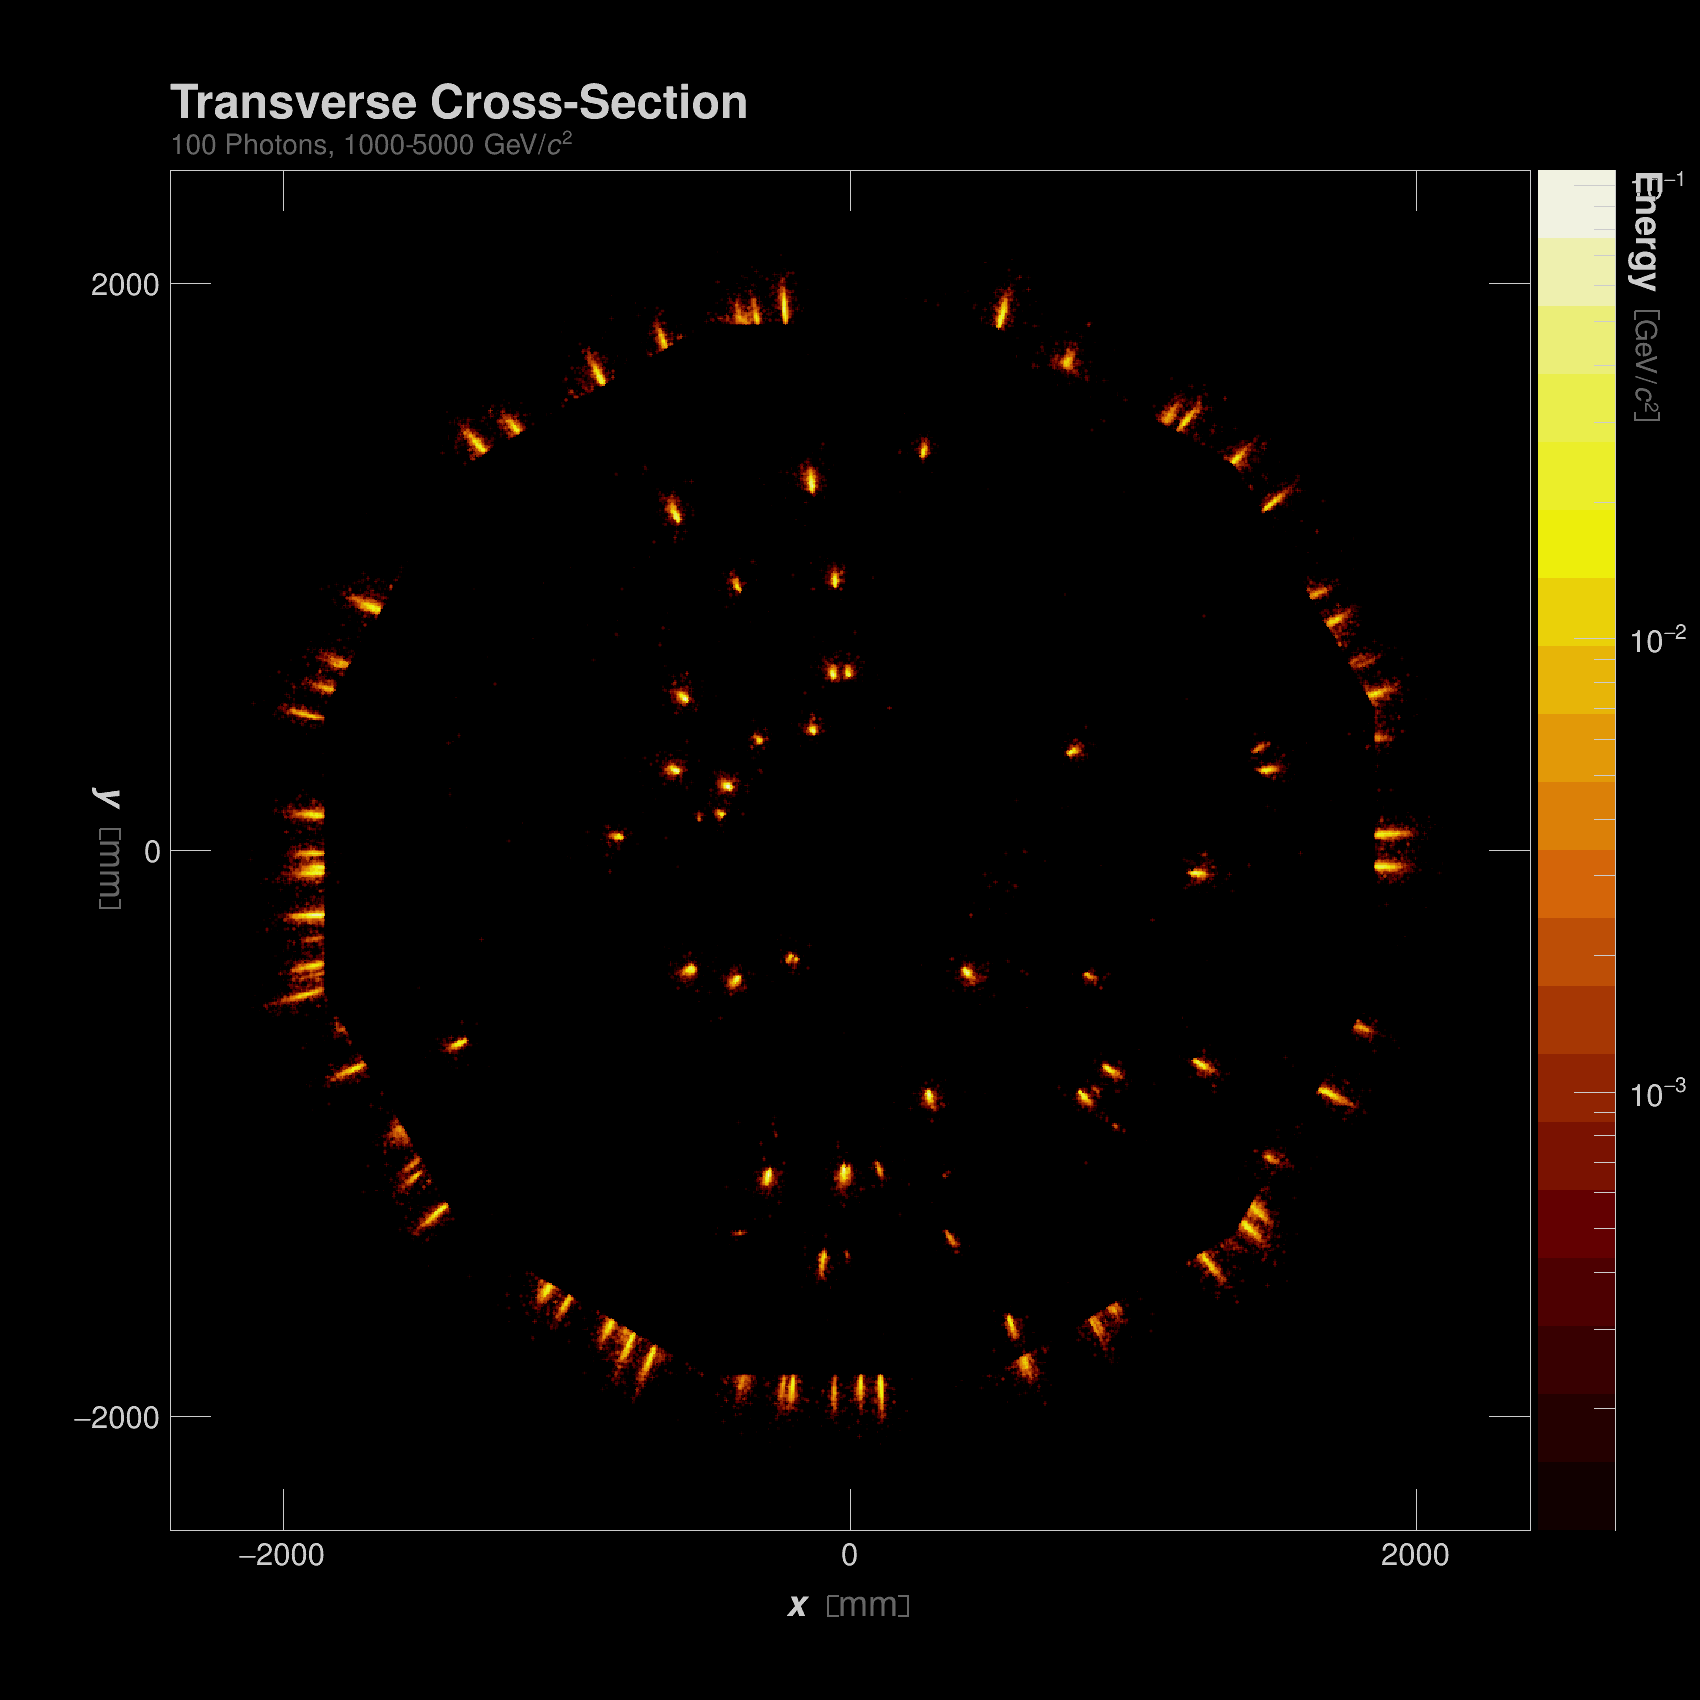

In [5]:
# %jsroot on

## DRAW HISTOGRAM ##
width = 600
height = width
h1.GetYaxis().CenterTitle()
h1.GetYaxis().RotateTitle()
h1.GetXaxis().CenterTitle()
h1.GetZaxis().SetTitle("#bf{Energy} #scale[.8]{#color[13]{#[]{Ge#kern[-.115]{V}#kern[.2]{/}#it{c}^{2}}}}")
h1.GetZaxis().SetTitleOffset(0.5)
h1.GetZaxis().RotateTitle()

# Smoothing
smoothing=1
for n in range(smoothing):
    h1.Smooth(1, "k3a")


c = ROOT.TCanvas("c1", "2-D Histograms", width, height)
c.GetPad(0).SetLogz()
c.SetBatch()
c.SetCanvasSize(2800, 2800)
h1.Draw("COL Z PLC")
h1.Draw("same axis x+ y+")
c.SetRealAspectRatio()

title = ROOT.TLatex()
title.SetTextColor(17)
title.SetTextSize(.03)
title.SetTextAlign(11)
title.DrawLatexNDC(0.1, 0.9305, "T#kern[-.015]{ransverse}#kern[-.6]{ }Cross-Section")
subtitle = ROOT.TLatex()
subtitle.SetTextColor(13)
subtitle.SetTextSize(.018)
subtitle.SetTextAlign(11)
subtitle.DrawLatexNDC(0.1, 0.909, "#bf{100 Photons, 1000-#kern[-.15]{5000} Ge#kern[-.17]{V}/#kern[-.07]{#it{c}^{2}}}")

c.Draw()

In [ ]:
detector = ROOT.TFile("/home/rhillman/work/detector-simulation/geometries/MuColl_10TeV_v0A/MuColl_10TeV_v0A.root","Read")
detector.ls()

AttributeError: <class cppyy.gbl.TFile at 0xa3b9e20> object has no attribute 'IsBuilt'